비지도학습(Unsupervised Learning)
- 지도 학습과는 달리 정답을 알려주지 않고 비슷한 데이터를 군집화 하여 미래를 예측하는 학습 방법
- 라벨링이 되어있지 않은 데이터로부터 패턴이나 형태를 찾는 방법
- 예측 등이 아닌 데이터가 어떻게 구성되어있는지 밝히는데 주로 사용하고, 일종의 그룹핑 알고리즘
- 대표적인 방법으로 Clustering(군집화)

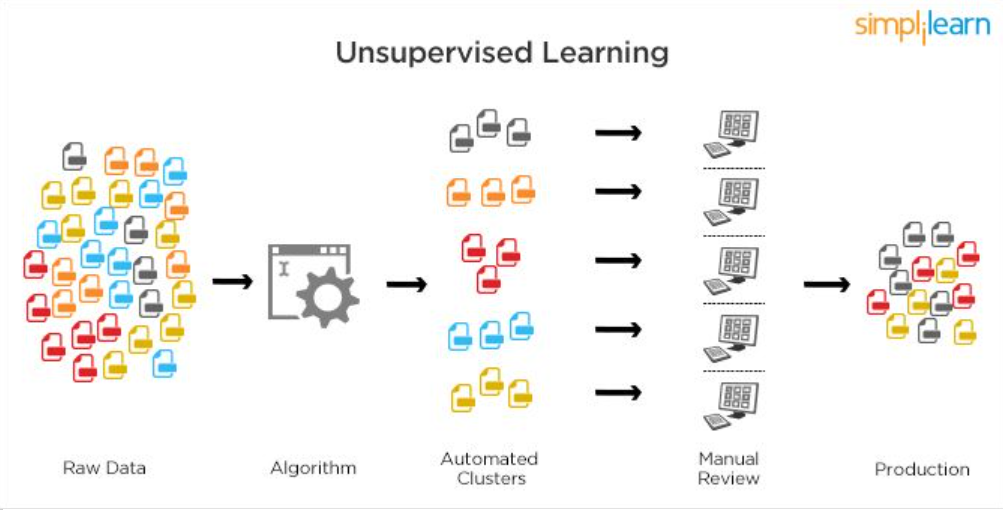
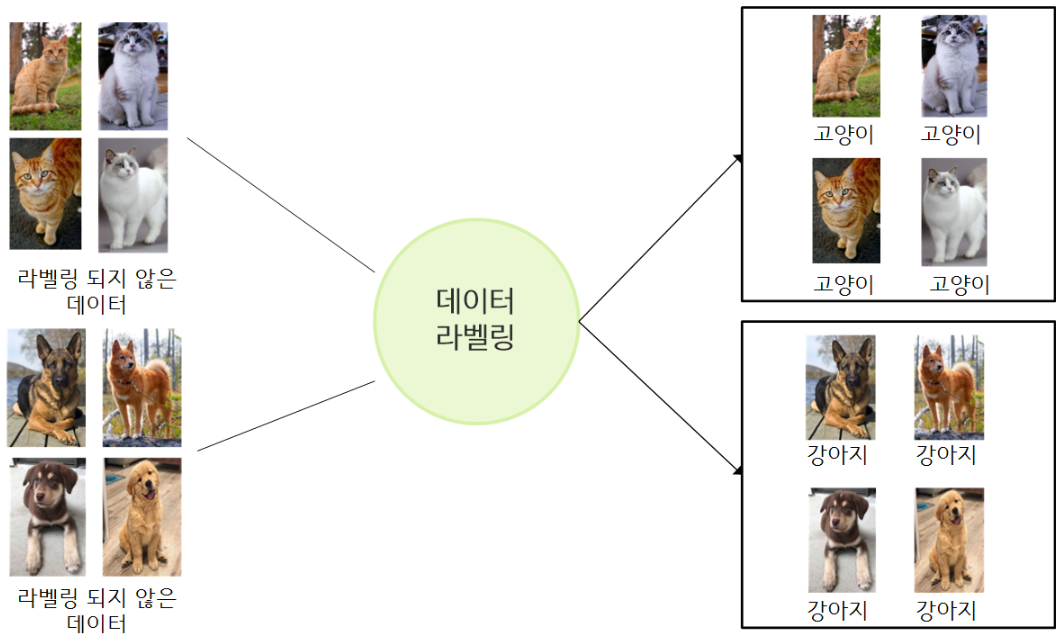

비지도학습의 장점
- 사용자가 직접 목표 값에 개입할 필요가 없어 속도가 매우 빠름
비지도학습의 단점
- 정답이 정해져있지 않으므로 분류 기준과 군집을 예측할 수 없으며, 모델 성능을 평가하기 어려움

비지도학습의 대표적인 알고리즘
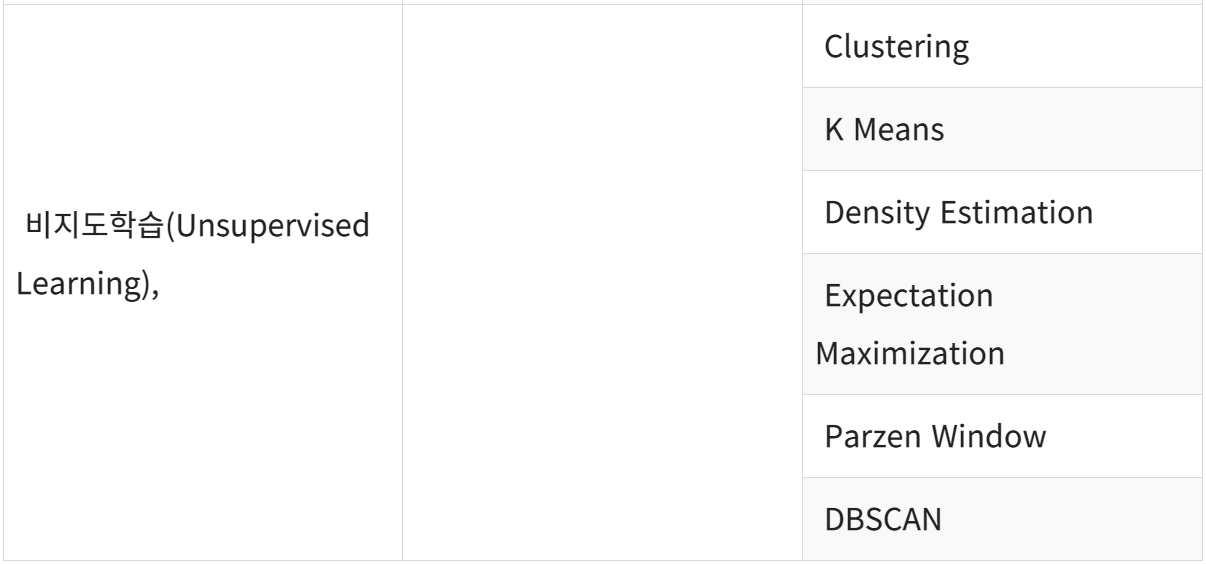

클러스터링(Clustering, 군집화)
- 데이터 X가 무엇인지에 대한 y(label)가 없습니다.
- 그렇기 때문에 y가 될 수 있는 분류 기준(클래스 또는 카테고리)도 없다
- 클러스터링이란 명확한 분류 기준이 없는 상황에서 데이터들을 분석하여 가까운(또는 유사한) 것들끼리 묶어 주는 작업

과일 사진 데이터 준비하기

In [3]:
pip install wget

Note: you may need to restart the kernel to use updated packages.


In [4]:
import wget

In [12]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy

'wget'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.


In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
fruits = np.load('fruits_300.npy')

In [ ]:
print(fruits.shape)
# 300개의 샘플, 이미지 높이 100, 이미지 너비 100

In [ ]:
print(fruits[0, 0, :])
# 첫번째 이미지의 첫번째 행 픽셀 값들
# 0에 가까울수록 검에, 높을수록 밝게

In [ ]:
plt.imshow(fruits[0], cmap='gray')
plt.show()
# 첫번째 이미지 사진(사과)

In [ ]:
plt.imshow(fruits[0], cmap='gray_r')
plt.show()
# 보기 편하게 gray_r

In [ ]:
fig, axs = plt.subplots(1, 2)
axs[0].imshow(fruits[100], cmap='gray_r')
axs[1].imshow(fruits[200], cmap='gray_r')
plt.show()
# 파인애플, 바나나 이미지 출력

픽셀 값 분석하기

In [ ]:
apple = fruits[0:100].reshape(-1, 100*100)
pineapple = fruits[100:200].reshape(-1, 100*100)
banana = fruits[200:300].reshape(-1, 100*100)
# apple, pineapple, banana 1차원 배열화
# reshape(-1) -> 자동으로 남은 차원 할당

In [ ]:
print(apple.shape)

In [ ]:
print(apple.mean(axis=1))
# apple sample 100개에 대한 픽셀 평균값

In [ ]:
plt.hist(np.mean(apple, axis=1), alpha=0.8)
plt.hist(np.mean(pineapple, axis=1), alpha=0.8)
plt.hist(np.mean(banana, axis=1), alpha=0.8)
plt.legend(['apple', 'pineapple', 'banana'])
plt.show()
# alpha = 투명도

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(20, 5))
axs[0].bar(range(10000), np.mean(apple, axis=0))
axs[1].bar(range(10000), np.mean(pineapple, axis=0))
axs[2].bar(range(10000), np.mean(banana, axis=0))
plt.show()
# 샘플에 대한 평균값이 아닌 픽셀별 평균값
# 과일마다 값이 높은 구간 다름

In [ ]:
apple_mean = np.mean(apple, axis=0).reshape(100, 100)
pineapple_mean = np.mean(pineapple, axis=0).reshape(100, 100)
banana_mean = np.mean(banana, axis=0).reshape(100, 100)

fig, axs = plt.subplots(1, 3, figsize=(20, 5))
axs[0].imshow(apple_mean, cmap='gray_r')
axs[1].imshow(pineapple_mean, cmap='gray_r')
axs[2].imshow(banana_mean, cmap='gray_r')
plt.show()
# 픽셀 평균값을 100 * 100 크기로 바꿔서 이미지로 출력 비교

평균값과 가까운 사진 고르기

In [ ]:
abs_diff = np.abs(fruits - apple_mean)
abs_mean = np.mean(abs_diff, axis=(1,2))
print(abs_mean.shape)
# fruits 배열의 모든 샘플에서 apple_mean을 뺀 절대값 평균 계산
# 각 샘플의 평균을 구하기 위해 axis에 두번째, 세번째 차원을 지정해줌 -> 각 샘플에 대한 평균 (300,)

In [ ]:
apple_index = np.argsort(abs_mean)[:100]
fig, axs = plt.subplots(10, 10, figsize=(10,10))
for i in range(10):
    for j in range(10):
        axs[i, j].imshow(fruits[apple_index[i*10 + j]], cmap='gray_r')
        axs[i, j].axis('off')
plt.show()
# 오차 가장 작은 100개 샘플 추출
# fruits 전체 sample에서 apple_mean을 뺐으므로 값이 작은것들이 사과가 나와야함

In [ ]:
abs_diff = np.abs(fruits - banana_mean)
abs_mean = np.mean(abs_diff, axis=(1,2))

banana_index = np.argsort(abs_mean)[:100]
fig, axs = plt.subplots(10, 10, figsize=(10,10))
for i in range(10):
    for j in range(10):
        axs[i, j].imshow(fruits[banana_index[i*10 + j]], cmap='gray_r')
        axs[i, j].axis('off')
plt.show()
# 바나나 사진 비교

k-means Clustering (k-means 알고리즘)
- k 값이 주어져 있을 때, 주어진 데이터들을 k 개의 클러스터로 묶는 알고리즘으로 대표적인 클러스터링 기법 중 하나
- 군집 중심점(centroid)이라는 특정한 임의의 지점을 선택해 해당 중심에 가장 가까운 포인트들을 선택하는 군집화 기법
- K개의 centroid를 지정, K-Means는 거리 기반 군집화 방법

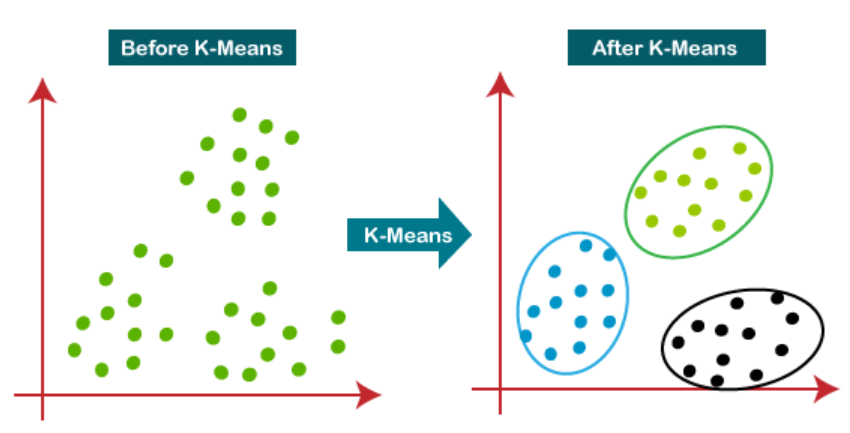

k-means Clustering의 특징
- KC는 각 군집 중심의 초기값을 랜덤하게 정하는 알고리즘, 초기값 위치에 따라 원하는 결과가 나오지 않을 수도 있음.
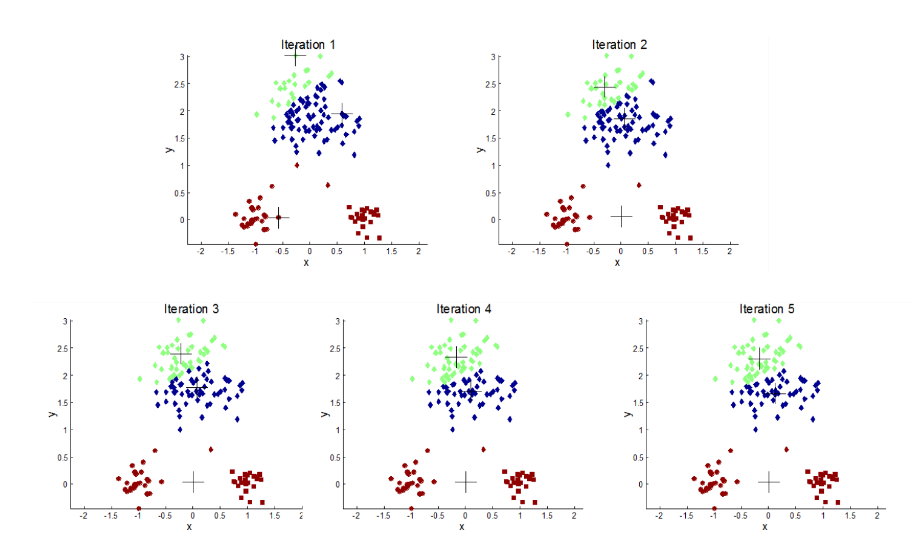
- 군집의 크기가 다를 경우 제대로 작동하지 않을 수 있음
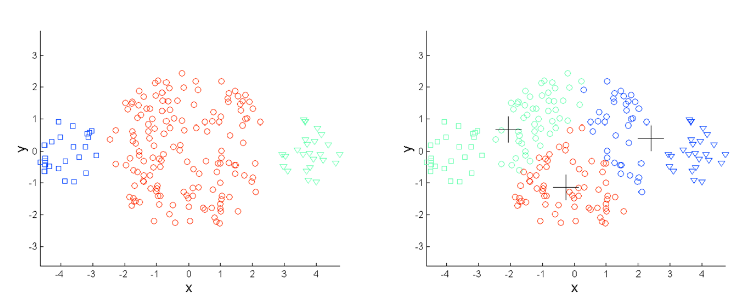
- 군집의 밀도가 다른 경우 제대로 작동하지 않을 수 있음
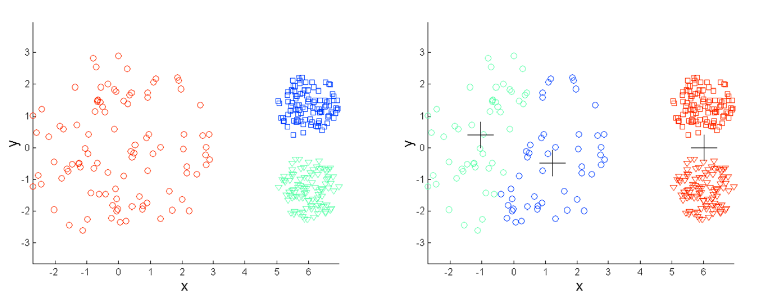
- 데이터 분포가 특이한 케이스도 원하지 않는 군집화 가능성
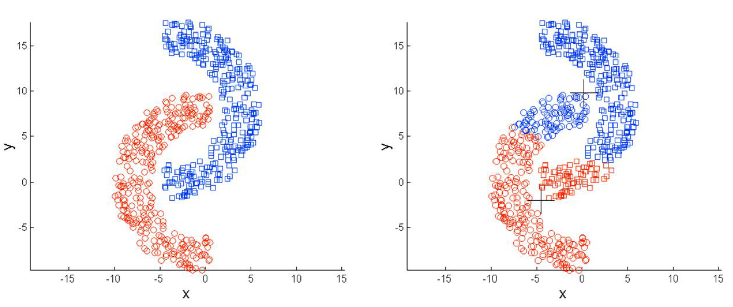

KMeans 클래스

In [ ]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy

In [ ]:
import numpy as np

fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100)
# 3차원(샘플 개수, 너비 * 너비) 배열 -> 2차원배열로 변경

In [ ]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_2d)
# 클러스터 개수 3개로 fit
# 비지도 학습이므로 fit함수에 타겟 데이터 없음

In [ ]:
print(km.labels_)
# 군집된 결과는 KMeans 클래스 labels_ 속성에 저장
# n_clusters = 3 이기 때문에 labels_ 배열값은 0, 1, 2 중 하나 

In [ ]:
print(np.unique(km.labels_, return_counts=True))
# 레이블 샘플 개수 확인

In [ ]:
import matplotlib.pyplot as plt

def draw_fruits(arr, ratio=1):
    n = len(arr)    # n은 샘플 개수입니다
    # 한 줄에 10개씩 이미지를 그립니다. 샘플 개수를 10으로 나누어 전체 행 개수를 계산합니다. 
    rows = int(np.ceil(n/10))
    # 행이 1개 이면 열 개수는 샘플 개수입니다. 그렇지 않으면 10개입니다.
    cols = n if rows < 2 else 10
    fig, axs = plt.subplots(rows, cols, 
                            figsize=(cols*ratio, rows*ratio), squeeze=False)
    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n:    # n 개까지만 그립니다.
                axs[i, j].imshow(arr[i*10 + j], cmap='gray_r')
            axs[i, j].axis('off')
    plt.show()

In [ ]:
draw_fruits(fruits[km.labels_==0])

In [ ]:
draw_fruits(fruits[km.labels_==1])

In [ ]:
draw_fruits(fruits[km.labels_==2])

클러스터 중심

In [ ]:
draw_fruits(km.cluster_centers_.reshape(-1, 100, 100), ratio=3)
# cluster_centers가 fruit_2d의 centroid 중심점이기 때문에 100 * 100 크기의 2차원 배열로 바꿔줌

In [ ]:
print(km.transform(fruits_2d[100:101]))
# fruits_2d[100] -> (10000,)크기의 배열이 되므로 오류
# frutis_2d[100:101] -> (1,10000) 크기의 배열로 전달하여 centroid 까지의 거리 계산

In [ ]:
print(km.predict(fruits_2d[100:101]))

In [ ]:
draw_fruits(fruits[100:101])

In [ ]:
print(km.n_iter_)
# k-means 알고리즘은 반복적으로 클러스터 중심을 옮기면서 최적의 클러스터를 찾는다
# 알고리즘이 반복한 횟수 -> km.n_iter_

최적의 k 찾기

엘보우 방법
- 이너셔 = 클러스터 중심(centroid)과 샘플 사이의 거리 제곱합
- 클러스터가 얼마나 밀집되어 있는지 나타내는 이너셔 사용
- 이너셔가 더이상 크게 줄지 않는다면 클러스터 개수 늘릴 필요 x

In [ ]:
inertia = []
for k in range(2, 7):
# 클러스터 개수 2~6까지 바꾸면서 5번 훈련
    km = KMeans(n_clusters=k, n_init='auto', random_state=42)
    km.fit(fruits_2d)
    inertia.append(km.inertia_)
    # 이너셔 리스트에 각 회차별 이너셔 값 저장
    
plt.plot(range(2, 7), inertia)
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()
# 이너셔가 급격히 꺾이는 k = 3 채택

주성분 분석

PCA(Principal Component Analysis, 주성분 분석)
- 데이터에 있는 분산이 큰 방향을 찾는 것, 분산 = 데이터가 널리 퍼져있는 정도
- 분산이 큰 방향 -> 데이터를 잘 표현하는 어떠한 벡터
- 가장 널리 사용되는 차원 축소 기법 중 하나로, 원 데이터의 분포를 최대한 보존하면서 고차원 공간의 데이터들을 저차원 공간으로 변환
- 첫 번째 주성분 PC1이 원 데이터의 분포를 가장 많이 보존하고, 두 번째 주성분 PC2가 그 다음으로 원 데이터의 분포를 많이 보존하는 식

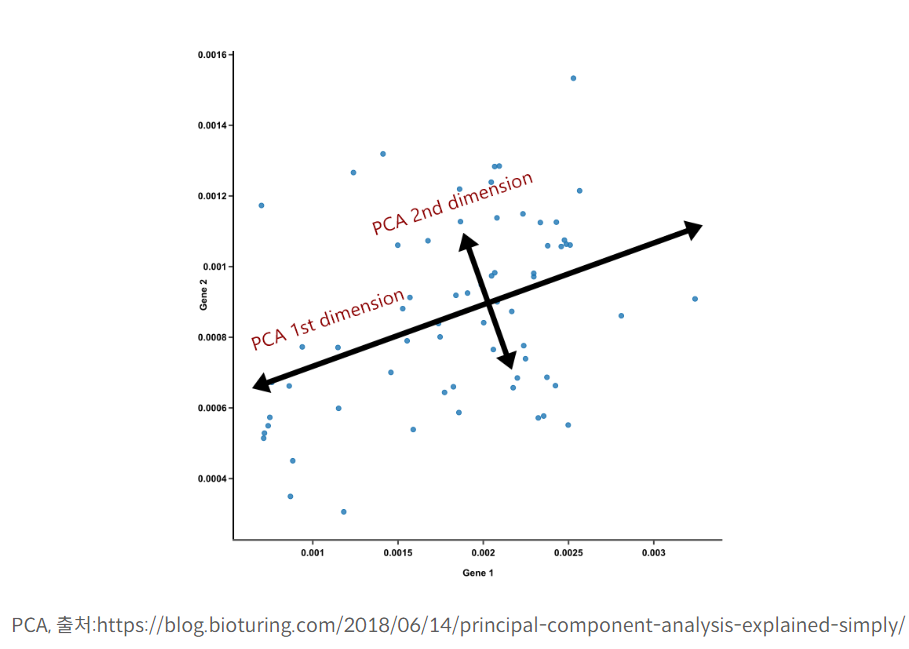

- 첫번째 주성분을 찾은 후 이 벡터에 수직이고 분산이 가장 큰 다음 방향을 찾는다 -> 두번째 주성분
- 위와 같은 방식으로 순차적으로 주성분 찾아나감

In [2]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy

'wget'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.


In [ ]:
import numpy as np

fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=50)
# 첫번째 차원 -> 50개의 주성분, 두번째 차원 -> 원본 데이터의 특성개수 10,000
pca.fit(fruits_2d)
# k-means와 마찬가지로 비지도학습이기 때문에 fit 할때 타겟 데이터 없음

In [ ]:
print(pca.components_.shape)

In [ ]:
import matplotlib.pyplot as plt

def draw_fruits(arr, ratio=1):
    n = len(arr)    # n은 샘플 개수입니다
    # 한 줄에 10개씩 이미지를 그립니다. 샘플 개수를 10으로 나누어 전체 행 개수를 계산합니다. 
    rows = int(np.ceil(n/10))
    # 행이 1개 이면 열 개수는 샘플 개수입니다. 그렇지 않으면 10개입니다.
    cols = n if rows < 2 else 10
    fig, axs = plt.subplots(rows, cols, 
                            figsize=(cols*ratio, rows*ratio), squeeze=False)
    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n:    # n 개까지만 그립니다.
                axs[i, j].imshow(arr[i*10 + j], cmap='gray_r')
            axs[i, j].axis('off')
    plt.show()

In [ ]:
draw_fruits(pca.components_.reshape(-1, 100, 100))
# 주성분 100 * 100 이미지 출력

In [ ]:
print(fruits_2d.shape)

In [ ]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)
# transform을 통하여 데이터의 차원을 50으로 줄임, 특성의 개수 10000 -> 50

원본 데이터 재구성

In [ ]:
fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)
# 50 -> 10000 으로 원 데이터 복원

In [ ]:
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)
# 100 * 100 크기로 바꿈

In [ ]:
for start in [0, 100, 200]:
    draw_fruits(fruits_reconstruct[start:start+100])
    print("\n")
#  100개씩 나누어서 출력

설명된 분산
- 주성분이 원본 데이터의 분산을 얼마나 잘 나타내는지 기록한 값

In [ ]:
print(np.sum(pca.explained_variance_ratio_))
# 주성분 50개 분산의 합

In [ ]:
plt.plot(pca.explained_variance_ratio_)

다른 알고리즘과 함께 사용하기

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

In [ ]:
target = np.array([0] * 100 + [1] * 100 + [2] * 100)

In [ ]:
from sklearn.model_selection import cross_validate

scores = cross_validate(lr, fruits_2d, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

In [ ]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

In [ ]:
pca = PCA(n_components=0.5)
pca.fit(fruits_2d)
# 특정 %의 설명된 분산을 얻도록 pca 모델 생성

In [ ]:
print(pca.n_components_)
# 50%의 분산을 설명할 수 있는 주성분 개수

In [ ]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)
# 2개의 특성만을 transform

In [ ]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))
# 2개 특성만을 이용한 교차검증의 결과, 시간

In [ ]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_pca)
# k_means 알고리즘을 이용한 클러스터

In [ ]:
print(np.unique(km.labels_, return_counts=True))
# 각 라벨의 개수

In [ ]:
for label in range(0, 3):
    draw_fruits(fruits[km.labels_ == label])
    print("\n")
# k_means를 이용한 그림 출력

In [ ]:
for label in range(0, 3):
    data = fruits_pca[km.labels_ == label]
    plt.scatter(data[:,0], data[:,1])
plt.legend(['apple', 'banana', 'pineapple'])
plt.show()
# 특성을 2개로 나눴기 때문에 시각화 용이
# km.labels_를 활용한 산점도 시각화
# 클러스터 구분 good